In [8]:
from warnings import warn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split,GridSearchCV

In [9]:
wi=pd.read_csv('wine.csv')

In [10]:
wi['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
wi.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
X=wi.drop(columns=["quality"])

In [13]:
y=wi['quality']

In [12]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [14]:
wi.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [15]:
## Now we check the corrleation of features with the target variable (salary)

corr_matrix = wi.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<AxesSubplot:>

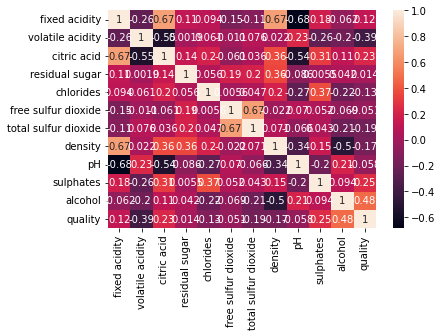

In [6]:
plt.fi
sns.heatmap(wi.corr(),annot=True)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=30)

In [15]:
mdl=DecisionTreeClassifier()
mdl.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5508583194831653, 0.9722222222222222, 'X[10] <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]'),
 Text(0.32566715365644433, 0.9166666666666666, 'X[6] <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6, 20, 406, 209, 23, 2]'),
 Text(0.20376836264207593, 0.8611111111111112, 'X[9] <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6, 19, 332, 202, 23, 2]'),
 Text(0.07463676817499464, 0.8055555555555556, 'X[6] <= 90.5\ngini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]'),
 Text(0.052045357066266354, 0.75, 'X[10] <= 9.075\ngini = 0.453\nsamples = 250\nvalue = [3, 14, 176, 55, 2, 0]'),
 Text(0.017156337122024447, 0.6944444444444444, 'X[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(0.010293802273214669, 0.6388888888888888, 'X[9] <= 0.54\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.006862534848809779, 0.5833333333333334, 'X[2] <= 0.14\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.00343126

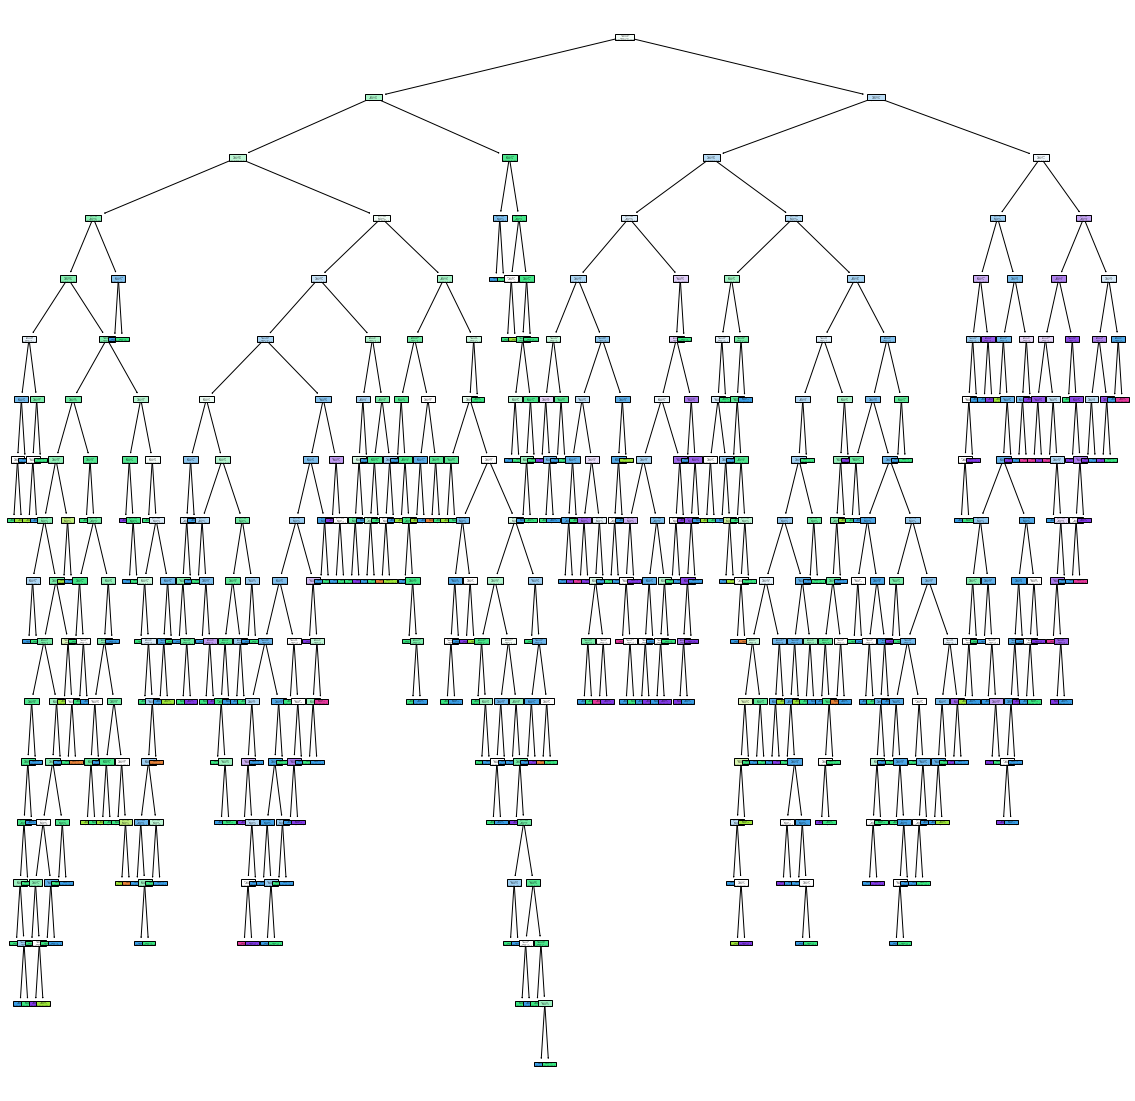

In [17]:
plt.figure(figsize=(20,20))
tree.plot_tree(mdl,filled=True)

In [18]:
w1=wi.head(500)

In [19]:
x=w1.drop(columns=['quality'])

In [20]:
y=w1['quality']

In [22]:
md1=DecisionTreeClassifier()
md1.fit(x,y)

DecisionTreeClassifier()

In [23]:
md1.predict(x)

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 4, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 4, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 4, 6, 5, 4, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       7, 4, 7, 5, 5, 5, 6, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 4, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 4, 5, 5,
       5, 7, 4, 8, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 8, 7, 6, 7, 5, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6,

[Text(0.44954731308411217, 0.9722222222222222, 'alcohol <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]\nclass = 5'),
 Text(0.28352803738317756, 0.9166666666666666, 'total sulfur dioxide <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]\nclass = 5'),
 Text(0.1764018691588785, 0.8611111111111112, 'citric acid <= 0.415\ngini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]\nclass = 5'),
 Text(0.07616822429906542, 0.8055555555555556, 'alcohol <= 9.05\ngini = 0.525\nsamples = 131\nvalue = [0, 8, 81, 39, 3, 0]\nclass = 5'),
 Text(0.022429906542056073, 0.75, 'sulphates <= 0.54\ngini = 0.403\nsamples = 12\nvalue = [0, 2, 1, 9, 0, 0]\nclass = 6'),
 Text(0.014953271028037384, 0.6944444444444444, 'pH <= 3.43\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]\nclass = 4'),
 Text(0.007476635514018692, 0.6388888888888888, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]\nclass = 4'),
 Text(0.022429906542056073, 0.6388888888888888, 'gini = 0.0\ns

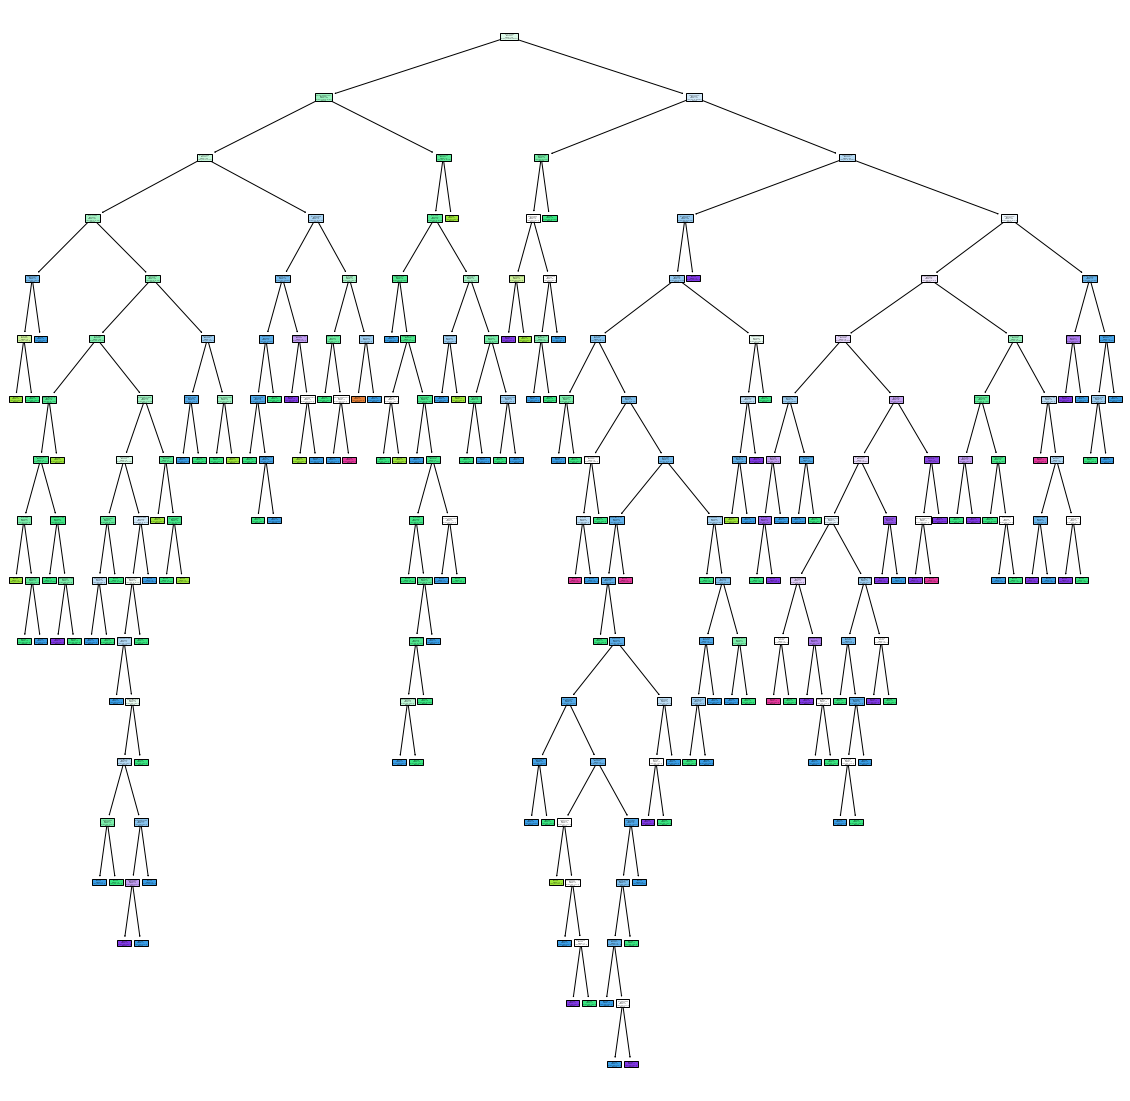

In [25]:
plt.figure(figsize=(20,20))
tree.plot_tree(md1,filled=True,class_names=[str(i) for i in set(y)],feature_names=x.columns)

In [26]:
y

0      5
1      5
2      5
3      6
4      5
      ..
495    8
496    6
497    5
498    8
499    6
Name: quality, Length: 500, dtype: int64

In [27]:
md1.score(x,y)

1.0

In [28]:
md1.score(X_test,y_test)

0.5975

In [31]:
#cost_complexity_prunning_path(x,y)
#Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier , this pruning technique is parameterized by the cost complexity parameter, ccp_alpha . Greater values of ccp_alpha increase the number of nodes pruned.
path=md1.cost_complexity_pruning_path(x,y)
ccp_alp=path.ccp_alphas

In [39]:
ccp_alp

array([0.        , 0.00166667, 0.00175   , 0.00181818, 0.00184615,
       0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.00203333, 0.00261111,
       0.00262769, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00271329, 0.00272222, 0.00283333, 0.003     , 0.003     ,
       0.003     , 0.003     , 0.00304762, 0.00304762, 0.00305051,
       0.00308418, 0.00328205, 0.00333333, 0.00333333, 0.00334032,
       0.00336606, 0.00342857, 0.00343316, 0.0035    , 0.0035    ,
       0.0036    , 0.00363636, 0.00373809, 0.0038    , 0.0038237 ,
       0.004     , 0.00404444, 0.00428571, 0.00428571, 0.00437662,
       0.00462338, 0.00465709, 0.00466667, 0.0048    , 0.00487179,
       0.00504242, 0.00508235, 0.00509091, 0.00510606, 0.00516667,
       0.00568485, 0.00589394, 0.00656364, 0.00671079, 0.00675

Text(0, 0.5, 'score')

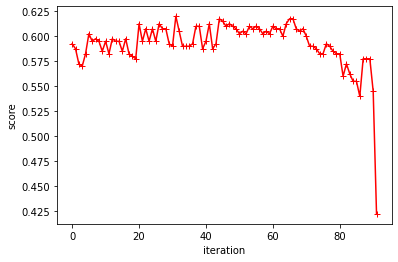

In [67]:
md2=[]
score=[]
for i in ccp_alp:
    mdt=DecisionTreeClassifier(ccp_alpha=i)
    mdt.fit(x,y)
    md2.append(mdt)
    score.append(mdt.score(X_test,y_test))
    
plt.plot(score,'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [40]:
md2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0016666666666666668),
 DecisionTreeClassifier(ccp_alpha=0.00175),
 DecisionTreeClassifier(ccp_alpha=0.0018181818181818184),
 DecisionTreeClassifier(ccp_alpha=0.0018461538461538455),
 DecisionTreeClassifier(ccp_alpha=0.001866666666666667),
 DecisionTreeClassifier(ccp_alpha=0.001882352941176471),
 DecisionTreeClassifier(ccp_alpha=0.0019230769230769243),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002033333333333334),
 DecisionTreeClassifier(ccp_alpha=0.0026111111111111114),
 DecisionTreeClassifier(ccp_alpha=0.002627692307

In [41]:
#train_score/test_score
train_score=[i.score(x,y) for i in md2]
test_score=[i.score(X_test,y_test)for i in md2]

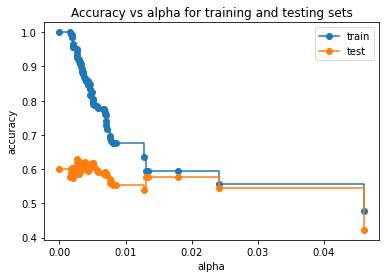

In [43]:
#learn how to plot------------------------?
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alp, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alp, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [47]:
wi.shape,X_test.shape,y_test.shape,x.shape,y.shape

((1599, 12), (400, 11), (400,), (500, 11), (500,))

In [48]:
#conclusion alpha value from 0.01-0.025 best perform dctree
mdl_ccp=DecisionTreeClassifier(random_state=0,ccp_alpha=.014)
mdl_ccp.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)

In [49]:
mdl_ccp.score(x,y)

0.596

In [50]:
mdl_ccp.score(X_test,y_test)

0.5775

[Text(0.5, 0.8333333333333334, 'X[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(0.25, 0.5, 'X[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.271\nsamples = 90\nvalue = [0, 3, 76, 11, 0, 0]'),
 Text(0.75, 0.5, 'X[9] <= 0.545\ngini = 0.657\nsamples = 241\nvalue = [0, 4, 72, 112, 46, 7]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.408\nsamples = 32\nvalue = [0, 2, 24, 5, 1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.638\nsamples = 209\nvalue = [0, 2, 48, 107, 45, 7]')]

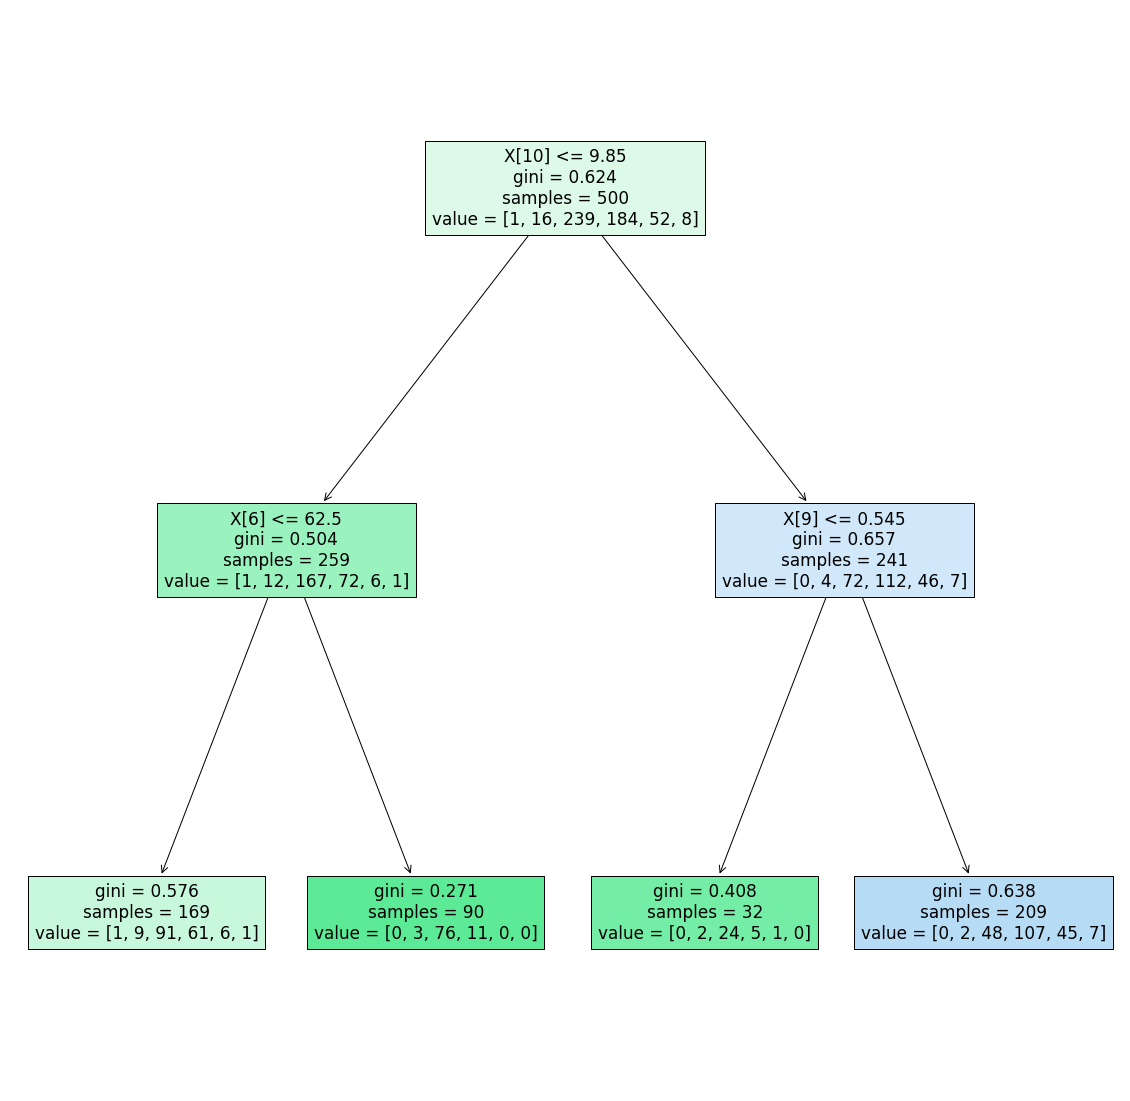

In [51]:
plt.figure(figsize=(20,20))
tree.plot_tree(mdl_ccp,filled=True)

In [52]:
#improve accur in traing model(gscv)
DecisionTreeClassifier()


DecisionTreeClassifier()

In [53]:
grid_parm={'criterion':["entropy","gini"],
           'splitter':["best","random"],
           'max_depth': range(2,40,1),
           'min_samples_split': range(1,10,1),
           'min_samples_leaf': range(1,10,1),
              
}

In [54]:
grid_ccp=GridSearchCV(estimator=mdl_ccp,param_grid=grid_parm,cv=10,n_jobs=-1)

In [56]:
grid_ccp.fit(x,y)

C:\Users\kamal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\kamal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
13680 fits failed out of a total of 123120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13680 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kamal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kamal\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super(

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(ccp_alpha=0.014, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']})

In [57]:
grid_ccp.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [59]:
mdl_newccp=DecisionTreeClassifier(criterion='entropy' , max_depth=17 ,min_samples_leaf=1 , min_samples_split=3 , splitter='random',ccp_alpha=0.014)

In [61]:
mdl_newccp.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.014, criterion='entropy', max_depth=17,
                       min_samples_split=3, splitter='random')

In [62]:
mdl_newccp.score(x,y)

0.618

In [63]:
mdl_newccp.score(X_test,y_test)

0.5525

In [64]:
pre=mdl_newccp.predict(X_train)

In [65]:
confusion_matrix(y_train,pre)

array([[  0,   0,   5,   3,   0,   0],
       [  0,   2,  16,  17,   0,   0],
       [  0,   1, 343, 168,   0,   0],
       [  0,   2, 177, 289,   9,   0],
       [  0,   0,  23, 115,  15,   0],
       [  0,   1,   2,  10,   1,   0]], dtype=int64)